In [132]:
import quandl
import pandas as pd
import requests
import numpy as np
from pprint import pprint
import matplotlib.pyplot as plt

import datetime

pd.options.mode.chained_assignment = None


In [4]:
data_df = pd.read_csv('covid_housing_data_2018.csv')

In [5]:
data_df.head()

,region_id,region_type_id,region_name,region_type,period_begin,period_end,duration,total_homes_sold,total_homes_sold_yoy,average_homes_sold,...,median_sale_price,median_sale_price_yoy,median_sale_ppsf,median_sale_ppsf_yoy,median_days_to_close,median_days_to_close_yoy,price_drops,price_drops_yoy,percent_active_listings_with_price_drops,percent_active_listings_with_price_drops_yoy
0,25540,-2,"Hartford, CT metro area",metro,6/11/2018,6/17/2018,1 weeks,403.0,0.092141,403.0,...,235000.0,-0.008439,132.596685,-0.033132,14.0,-27.0,344.0,NaN,0.048132,NaN
1,257,5,"Hot Spring County, AR",county,3/5/2018,3/11/2018,1 weeks,6.0,0.500000,6.0,...,92450.0,-0.428439,51.972227,-0.343256,0.0,-1.0,4.0,-0.428571,0.038835,-0.021510
2,25540,-2,"Hartford, CT metro area",metro,7/23/2018,7/29/2018,1 weeks,406.0,-0.169734,406.0,...,230000.0,0.045455,135.910371,0.000647,16.0,2.0,326.0,NaN,0.046819,NaN
3,25540,-2,"Hartford, CT metro area",metro,12/14/2020,12/20/2020,1 weeks,440.0,0.176471,440.0,...,261750.0,0.165924,142.611028,0.102003,12.0,-0.5,80.0,-0.245283,0.023141,0.001658
4,257,5,"Hot Spring County, AR",county,10/26/2020,11/1/2020,1 weeks,6.0,2.000000,6.0,...,125734.5,-0.054272,83.814092,0.405883,15.5,2.0,NaN,NaN,NaN,NaN


In [6]:
len(data_df)

735639

In [7]:
data_df.columns

Index(['region_id', 'region_type_id', 'region_name', 'region_type',
       'period_begin', 'period_end', 'duration', 'total_homes_sold',
       'total_homes_sold_yoy', 'average_homes_sold', 'average_homes_sold_yoy',
       'total_homes_sold_with_price_drops',
       'total_homes_sold_with_price_drops_yoy',
       'average_homes_sold_with_price_drops',
       'average_homes_sold_with_price_drops_yoy',
       'percent_homes_sold_with_price_drops',
       'percent_homes_sold_with_price_drops_yoy', 'median_sale_price',
       'median_sale_price_yoy', 'median_sale_ppsf', 'median_sale_ppsf_yoy',
       'median_days_to_close', 'median_days_to_close_yoy', 'price_drops',
       'price_drops_yoy', 'percent_active_listings_with_price_drops',
       'percent_active_listings_with_price_drops_yoy'],
      dtype='object')

In [8]:
# select 4 weeks duration, county, and NY state
ny_county_data_df = data_df[(data_df['duration'] == '4 weeks') & (data_df['region_type_id'] == 5) & (data_df['region_name'].str.contains('NY') )]
ny_county_data_df.head()

,region_id,region_type_id,region_name,region_type,period_begin,period_end,duration,total_homes_sold,total_homes_sold_yoy,average_homes_sold,...,median_sale_price,median_sale_price_yoy,median_sale_ppsf,median_sale_ppsf_yoy,median_days_to_close,median_days_to_close_yoy,price_drops,price_drops_yoy,percent_active_listings_with_price_drops,percent_active_listings_with_price_drops_yoy
81300,1946,5,"Allegany County, NY",county,3/9/2020,4/5/2020,4 weeks,9.0,-0.181818,2.0,...,55500.0,-0.061311,38.700087,0.059502,52.6,3.5,2.0,-0.500000,0.021663,0.000379
81310,1946,5,"Allegany County, NY",county,6/22/2020,7/19/2020,4 weeks,25.0,-0.074074,6.0,...,82000.0,0.073826,63.540428,0.330942,67.7,-2.1,3.0,-0.500000,0.034075,-0.002792
81311,1997,5,"Sullivan County, NY",county,12/23/2019,1/19/2020,4 weeks,65.0,0.120690,16.0,...,147250.0,0.117647,98.003313,0.067588,57.1,-0.6,12.0,0.000000,0.020588,0.001982
81312,1997,5,"Sullivan County, NY",county,10/7/2019,11/3/2019,4 weeks,83.0,-0.107527,20.0,...,145175.0,0.082386,95.461183,0.159072,48.5,0.9,31.0,0.192308,0.038599,0.006704
81313,1946,5,"Allegany County, NY",county,12/30/2019,1/26/2020,4 weeks,16.0,-0.238095,4.0,...,71000.0,0.198946,47.313213,0.471629,53.7,-1.0,2.0,-0.333333,0.021227,-0.002409


In [9]:
ny_county_data_df['region_name'].value_counts()

Genesee County, NY        154
Oswego County, NY         154
Bronx County, NY          154
Warren County, NY         154
Dutchess County, NY       154
Ontario County, NY        154
Sullivan County, NY       154
Orleans County, NY        154
Nassau County, NY         154
Onondaga County, NY       154
Putnam County, NY         154
Montgomery County, NY     154
Schoharie County, NY      154
Wyoming County, NY        154
Rockland County, NY       154
Allegany County, NY       154
Schenectady County, NY    154
Erie County, NY           154
Monroe County, NY         154
Queens County, NY         154
Chautauqua County, NY     154
Niagara County, NY        154
Suffolk County, NY        154
Orange County, NY         154
Richmond County, NY       154
Wayne County, NY          154
Fulton County, NY         154
Saratoga County, NY       154
Rensselaer County, NY     154
Albany County, NY         154
Livingston County, NY     154
Cattaraugus County, NY    154
Washington County, NY     154
Madison Co

In [10]:
# select NY city counties
ny_city_counties = ['Kings County, NY', 'Bronx County, NY','Richmond County, NY', 'New York County, NY','Queens County, NY']
ny_city_county_df = ny_county_data_df[ny_county_data_df['region_name'].isin (ny_city_counties)]
ny_city_county_df

,region_id,region_type_id,region_name,region_type,period_begin,period_end,duration,total_homes_sold,total_homes_sold_yoy,average_homes_sold,...,median_sale_price,median_sale_price_yoy,median_sale_ppsf,median_sale_ppsf_yoy,median_days_to_close,median_days_to_close_yoy,price_drops,price_drops_yoy,percent_active_listings_with_price_drops,percent_active_listings_with_price_drops_yoy
184809,1947,5,"Bronx County, NY",county,4/15/2019,5/12/2019,4 weeks,176.0,0.066667,44.0,...,487187.5,0.172180,281.064175,0.138735,72.6,8.8,35.0,0.206897,0.028978,0.006943
184813,1947,5,"Bronx County, NY",county,5/11/2020,6/7/2020,4 weeks,88.0,-0.460123,22.0,...,516250.0,0.127491,304.395545,0.173748,83.2,12.4,17.0,-0.604651,0.017052,-0.017552
184816,1947,5,"Bronx County, NY",county,8/20/2018,9/16/2018,4 weeks,194.0,-0.025126,48.0,...,477006.2,0.103223,270.179165,0.055092,63.7,-5.8,36.0,0.285714,0.026511,0.004773
184817,1947,5,"Bronx County, NY",county,1/22/2018,2/18/2018,4 weeks,179.0,0.040698,44.0,...,472250.0,0.209047,245.778401,0.070920,71.3,-0.7,22.0,-0.476190,0.019334,-0.013411
184843,1947,5,"Bronx County, NY",county,12/2/2019,12/29/2019,4 weeks,175.0,-0.107143,43.0,...,511625.0,-0.028714,289.096719,0.030122,76.1,11.1,20.0,-0.090909,0.018788,0.001557
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
656549,1985,5,"Queens County, NY",county,4/15/2019,5/12/2019,4 weeks,679.0,0.059282,169.0,...,587250.0,0.062151,415.394918,0.026918,70.0,-4.2,164.0,0.401709,0.028771,0.004377
656560,1985,5,"Queens County, NY",county,11/2/2020,11/29/2020,4 weeks,647.0,-0.031437,161.0,...,672250.0,0.063939,459.925326,0.046790,81.6,4.3,201.0,0.280255,0.029861,0.001669
656569,1985,5,"Queens County, NY",county,5/27/2019,6/23/2019,4 weeks,660.0,-0.085873,165.0,...,592487.5,0.033108,435.502574,0.026184,75.3,1.7,210.0,0.544118,0.035231,0.008236
656616,1985,5,"Queens County, NY",county,12/10/2018,1/6/2019,4 weeks,614.0,-0.119082,153.0,...,598125.0,0.003145,419.841642,-0.007095,77.0,-2.2,85.0,0.603774,0.016185,0.003270


In [11]:
# select NY suburb counties
ny_suburb_counties = ['Nassau County, NY', 'Suffolk County, NY','Westchester County, NY', 'Rockland County, NY']

ny_suburb_county_df = ny_county_data_df[ny_county_data_df['region_name'].isin (ny_suburb_counties)]
ny_suburb_county_df.head()


,region_id,region_type_id,region_name,region_type,period_begin,period_end,duration,total_homes_sold,total_homes_sold_yoy,average_homes_sold,...,median_sale_price,median_sale_price_yoy,median_sale_ppsf,median_sale_ppsf_yoy,median_days_to_close,median_days_to_close_yoy,price_drops,price_drops_yoy,percent_active_listings_with_price_drops,percent_active_listings_with_price_drops_yoy
190840,1996,5,"Suffolk County, NY",county,7/23/2018,8/19/2018,4 weeks,1555.0,-0.039531,388.0,...,395000.0,0.077179,236.679908,0.075146,63.0,-2.5,294.0,0.130769,0.041054,0.004976
190846,1996,5,"Suffolk County, NY",county,4/9/2018,5/6/2018,4 weeks,1131.0,0.020758,282.0,...,358750.0,0.053211,221.243118,0.017790,60.5,0.9,205.0,-0.131356,0.033580,-0.000449
217976,1988,5,"Rockland County, NY",county,6/18/2018,7/15/2018,4 weeks,266.0,0.171806,66.0,...,435750.0,0.068997,219.128849,0.060637,57.2,-5.3,60.0,0.111111,0.045394,0.005382
217984,1988,5,"Rockland County, NY",county,6/10/2019,7/7/2019,4 weeks,234.0,-0.130112,58.0,...,432078.3,-0.008426,216.423251,-0.008699,60.8,3.6,77.0,0.327586,0.052891,0.008216
217997,1988,5,"Rockland County, NY",county,12/10/2018,1/6/2019,4 weeks,211.0,0.039409,52.0,...,391375.0,-0.039688,212.493656,0.009371,55.7,-1.9,26.0,1.000000,0.026144,0.011827


In [12]:
# Remove NY city and suburb counties to create rural county list
counties_to_remove = ['Nassau County, NY', 'Suffolk County, NY','Westchester County, NY', 'Rockland County, NY','Kings County, NY', 'Bronx County, NY','Richmond County, NY', 'New York County, NY','Queens County, NY']
ny_rural_county_df = ny_county_data_df[~ny_county_data_df['region_name'].isin (counties_to_remove)]
ny_rural_county_df['region_name'].value_counts()

Niagara County, NY        154
Onondaga County, NY       154
Madison County, NY        154
Washington County, NY     154
Erie County, NY           154
Cattaraugus County, NY    154
Schenectady County, NY    154
Livingston County, NY     154
Albany County, NY         154
Allegany County, NY       154
Wyoming County, NY        154
Schoharie County, NY      154
Montgomery County, NY     154
Rensselaer County, NY     154
Oswego County, NY         154
Genesee County, NY        154
Saratoga County, NY       154
Fulton County, NY         154
Orleans County, NY        154
Wayne County, NY          154
Sullivan County, NY       154
Ontario County, NY        154
Dutchess County, NY       154
Orange County, NY         154
Warren County, NY         154
Monroe County, NY         154
Putnam County, NY         154
Chautauqua County, NY     154
Cayuga County, NY         154
Name: region_name, dtype: int64

In [13]:
# ny_city_county_df has city counties
# ny_rural_county_df has rural counties
# ny_suburb_county_df has suburb counties


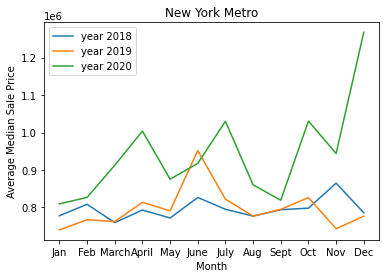

In [166]:
ny_city_county_df['year'] = pd.DatetimeIndex(ny_city_county_df['period_begin']).year
ny_city_county_df['month'] = pd.DatetimeIndex(ny_city_county_df['period_begin']).month_name()
ny_city_county_df['month_int'] = pd.DatetimeIndex(ny_city_county_df['period_begin']).month

groupbyyearmonth = ny_city_county_df.groupby(['year','month', 'month_int'])
groupby_df = groupbyyearmonth.mean()
ungroup_df = groupby_df.reset_index()

year2018 = ungroup_df.loc[ungroup_df['year']==2018]
year2018 = year2018.sort_values(by='month_int')
year2018 = year2018.reset_index(drop=True)

year2019 = ungroup_df.loc[ungroup_df['year']==2019]
year2019 = year2019.sort_values(by='month_int')
year2019 = year2019.reset_index(drop=True)

year2020 = ungroup_df.loc[ungroup_df['year']==2020]
year2020 = year2020.sort_values(by='month_int')
year2020 = year2020.reset_index(drop=True)

y2018 = plt.plot(year2018['month_int'], year2018['median_sale_price'])
y2019 = plt.plot(year2019['month_int'], year2019['median_sale_price'])
y2020 = plt.plot(year2020['month_int'], year2020['median_sale_price'])


plt.xticks(year2018['month_int'],['Jan','Feb','March','April','May','June','July','Aug','Sept','Oct','Nov','Dec'])

plt.title('New York Metro')

plt.xlabel('Month')

plt.ylabel('Average Median Sale Price')

plt.legend(['year 2018', 'year 2019','year 2020'], loc=2)

plt.show()

